# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r'C:\Users\SRK\Desktop\siva_python\Regression\mini\bigcity.csv')
df.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [3]:
df.rename(columns ={'Unnamed: 0': 'city_code'},inplace =True)

# 2. Collect and load data

# 3. Explore numeric variables - five number summary

In [4]:
df.describe()

,city_code,u,x
count,49.00000,49.000000,49.000000
mean,25.00000,103.142857,127.795918
std,14.28869,104.405061,123.121211
min,1.00000,2.000000,46.000000
25%,13.00000,43.000000,58.000000
50%,25.00000,64.000000,79.000000
75%,37.00000,120.000000,130.000000
max,49.00000,507.000000,634.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   city_code  49 non-null     int64
 1   u          49 non-null     int64
 2   x          49 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB


In [6]:
df.isna().sum()

city_code    0
u            0
x            0
dtype: int64

In [7]:
df[df.duplicated()]

,city_code,u,x


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

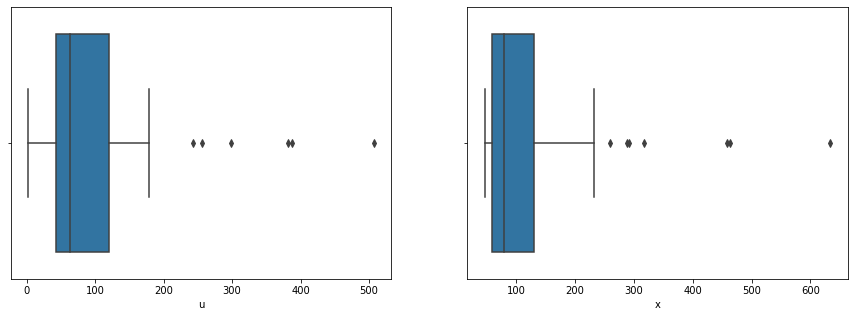

In [8]:
fig,axes = plt.subplots(1,2,figsize =(15,5))


sns.boxplot(df.u,ax =axes[0])
sns.boxplot(df.x,ax =axes[1])

In [9]:
q3 =df.u.quantile(0.75)
q1 =df.u.quantile(0.25)
IQR = q3-q1
ul = q3+1.5*IQR
ll = q1-1.5*IQR
q3x =df.x.quantile(0.75)
q1x =df.x.quantile(0.25)
IQRx = q3-q1
ulx = q3x+1.5*IQRx
llx = q1x-1.5*IQRx

In [10]:
#ouliers removal
#df =df[(df.u<ul) & (df.x < ulx)]
#df.shape

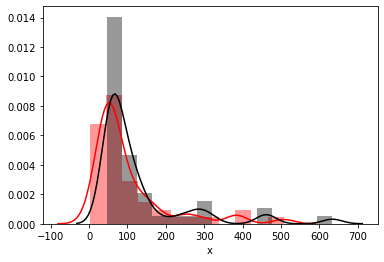

In [11]:
sns.distplot(df.u,color ='r')
sns.distplot(df.x,color ='k')


<BarContainer object of 49 artists>

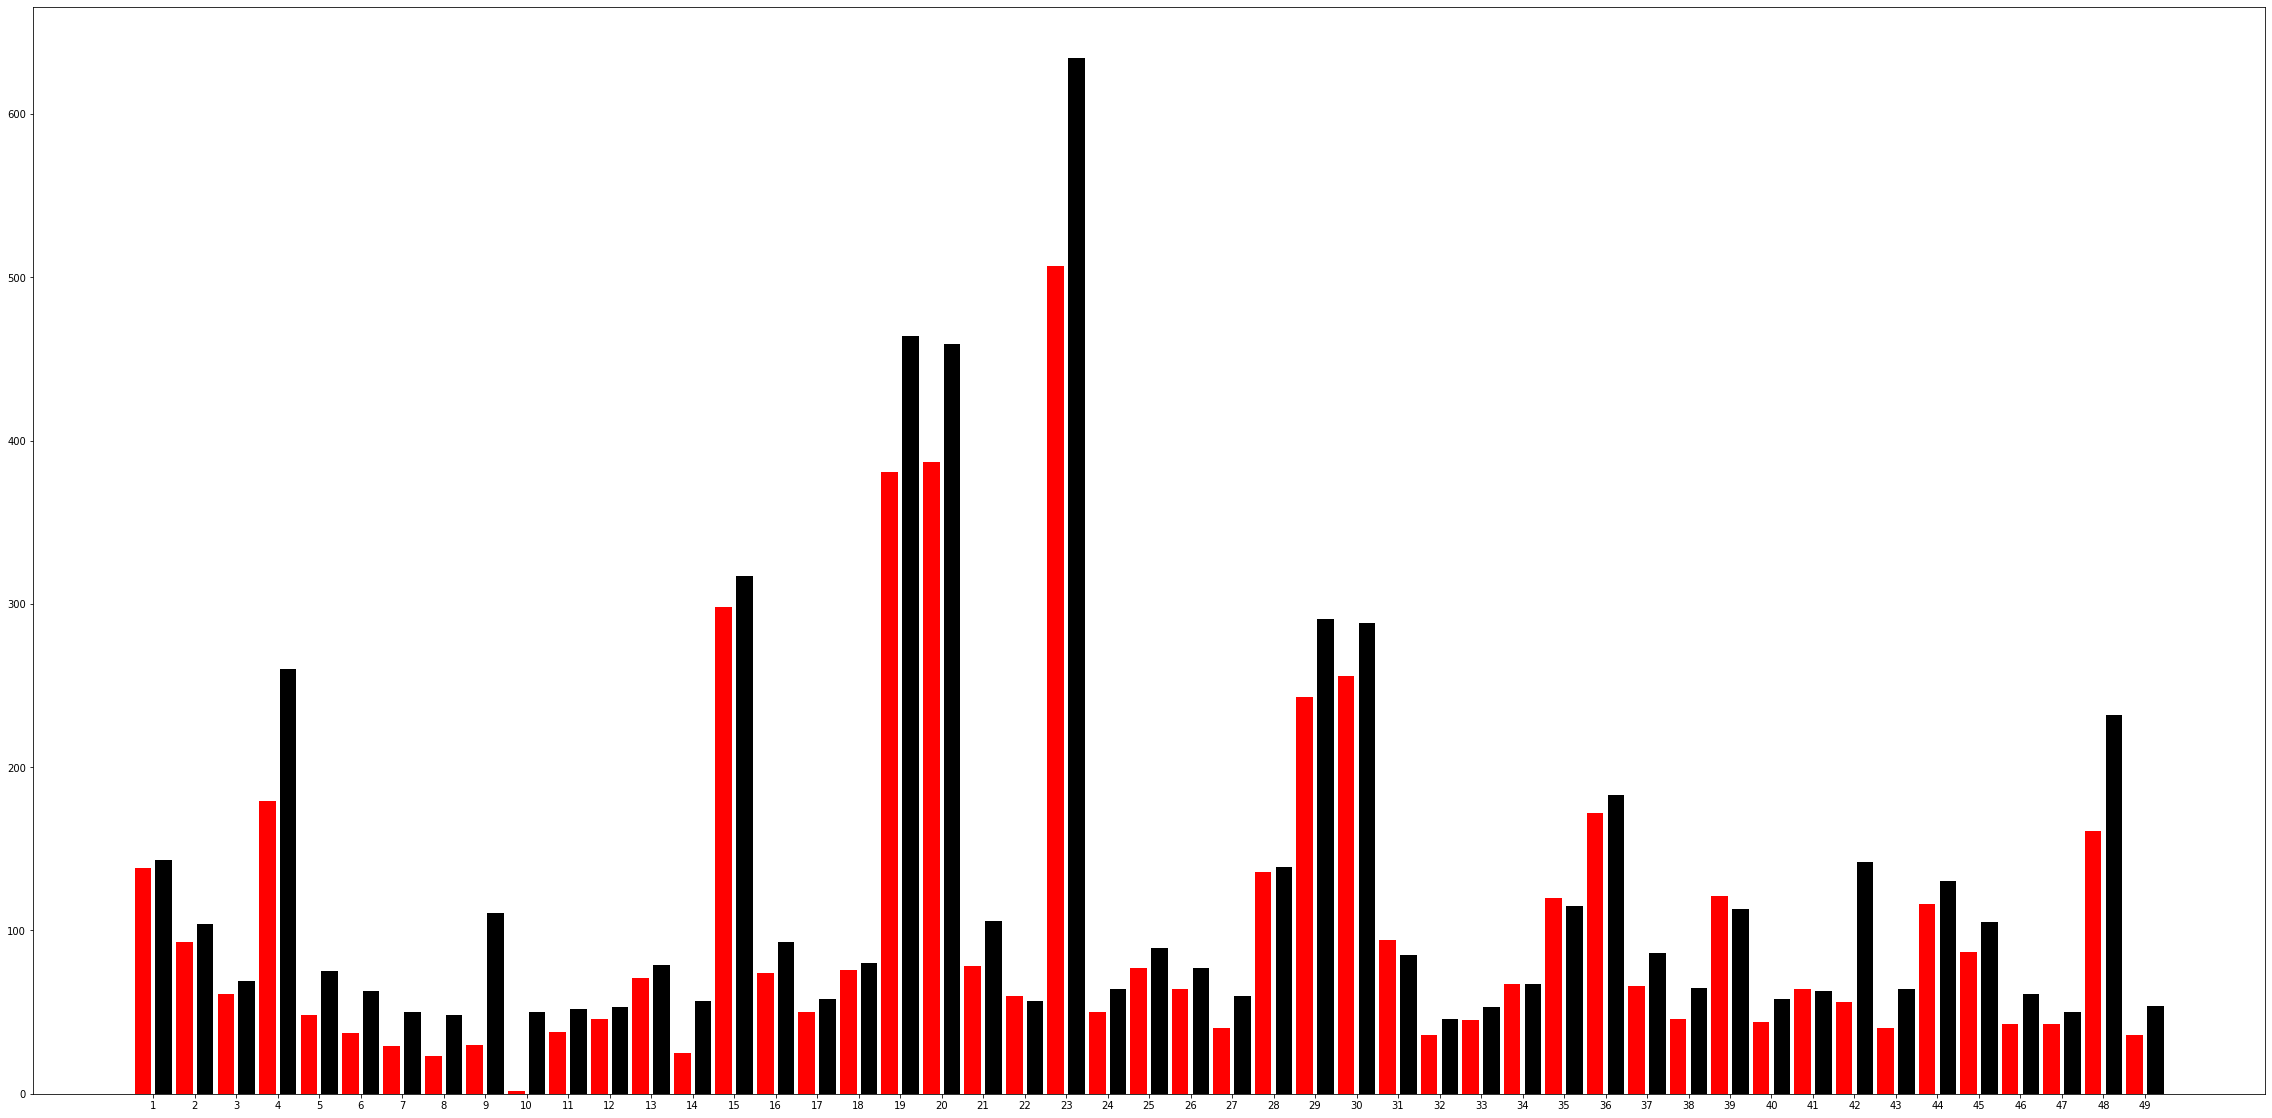

In [12]:
plt.figure(num=None, figsize=(40,20))
plt.bar(df.city_code-0.25,df.u,color ='r',width=0.4)

plt.xticks(df.city_code)
plt.bar(df.city_code+0.25,df.x,color ='k',width=0.4)


# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

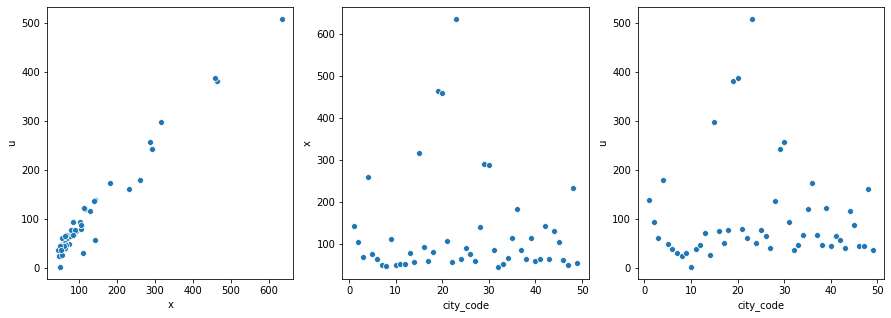

In [13]:
fig,axes = plt.subplots(1,3,figsize =(15,5))

sns.scatterplot(df.x,df.u,ax =axes[0])
sns.scatterplot(df.city_code,df.x,ax =axes[1])
sns.scatterplot(df.city_code,df.u,ax =axes[2])

# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [14]:
df.head()

,city_code,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [15]:
#df =pd.get_dummies(df ,columns =['city_code'],drop_first =True)

In [16]:
df.shape

(49, 3)

In [17]:
df.head()

,city_code,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

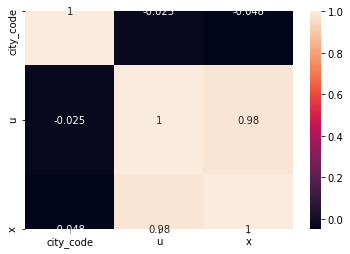

In [18]:
sns.heatmap(df.corr(),annot =True)

The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [19]:
df.columns

Index(['city_code', 'u', 'x'], dtype='object')

In [20]:
y =df['x']
X =df.drop(columns = 'x')


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((34, 2), (15, 2), (34,), (15,))

# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [22]:
from sklearn.linear_model import LinearRegression

linear =LinearRegression()
model =linear.fit(X_train,y_train)

# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

In [23]:
model.coef_,model.intercept_

(array([-0.24433696,  1.15546937]), 11.440185717935691)

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [24]:
predicted_test = model.predict(X_test)

In [25]:
from sklearn.metrics import mean_absolute_error

In [26]:
mean_absolute_error(y_test,predicted_test)

12.240383874548188

# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [27]:
model.score(X_train,y_train)

0.9588606935646055

In [28]:
model.score(X_test,y_test)

0.9758229345293756

## 12. do regularisation:


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV


In [30]:
lambdas=np.linspace(0,5,100)
params={'alpha':lambdas}
model=Ridge(fit_intercept=True)
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error',n_jobs=-1)
grid_search.fit(X_train,y_train)
print(grid_search.best_estimator_)
grid_search.cv_results_
test_pred=grid_search.predict(X_test)
print('MSE',mean_absolute_error(y_test,test_pred))
print('train r2',grid_search.score(X_train,y_train) ,'test r2',grid_search.score(X_test,y_test))

Ridge(alpha=5.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
MSE 12.23932365779653
train r2 -18.539236713989922 test r2 -12.23932365779653


In [31]:
%%time
lambdas=np.linspace(10,20,10)
params={'alpha':lambdas}
model=Ridge(fit_intercept=True,max_iter = 1000)
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='r2',n_jobs=-1)
grid_search.fit(X_train,y_train)
print(grid_search.best_estimator_)
grid_search.cv_results_
test_pred=grid_search.predict(X_test)
print('MSE',mean_absolute_error(y_test,test_pred))
print('train r2',grid_search.score(X_train,y_train) ,'test r2',grid_search.score(X_test,y_test))

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, random_state=None, solver='auto', tol=0.001)
MSE 12.23826471234764
train r2 0.9588606912682663 test r2 0.975825038687217
Wall time: 523 ms


MSE 12.23826471234764
train r2 0.9588606912682663 test r2 0.975825038687217


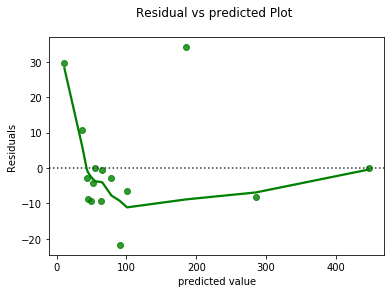

(10, None)

In [32]:
model1=RidgeCV(alphas=(10,12,14,15),fit_intercept=True,scoring='r2',cv=10)#gcv_mode = ( 'svd', 'eigen')
model1.fit(X_train,y_train)
test_predcv =model1.predict(X_test)
print('MSE',mean_absolute_error(y_test,test_predcv))
print('train r2',model1.score(X_train,y_train) ,'test r2',model1.score(X_test,y_test))
resid = y_test -test_predcv
ax = sns.residplot(test_predcv, resid, lowess = True, color = 'g')
# lo we ss is a smoothening curving.locally weighted scatter plot smoothing.
ax.set(xlabel = 'predicted value', ylabel = 'Residuals', title = 'Residual vs predicted Plot \n')
plt.show()

model1.alpha_,model1.gcv_mode

MSE 12.130143863722408
train r2 0.9581047046733497 test r2 0.976195250029567


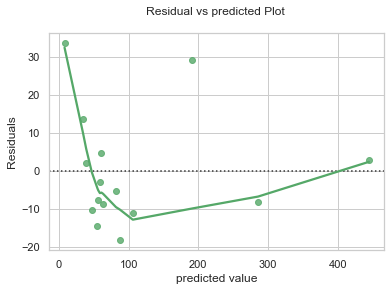

Wall time: 494 ms


(60.0,)

In [33]:
%%time
model2=LassoCV(eps=0.001,
    n_alphas=100, alphas=(59,59.5,60),fit_intercept=True,cv=10)
model2.fit(X_train,y_train)
test_predcv =model2.predict(X_test)
print('MSE',mean_absolute_error(y_test,test_predcv))
print('train r2',model2.score(X_train,y_train) ,'test r2',model2.score(X_test,y_test))
resid = y_test -test_predcv


#residual plot
sns.set(style = 'whitegrid')


ax = sns.residplot(test_predcv, resid, lowess = True, color = 'g')
# lo we ss is a smoothening curving.locally weighted scatter plot smoothing.
ax.set(xlabel = 'predicted value', ylabel = 'Residuals', title = 'Residual vs predicted Plot \n')
plt.show()
model2.alpha_,

In [34]:
%%time
lambdas=np.linspace(0,0.5,100)
params={'alpha':lambdas}
model=Ridge(fit_intercept=True)
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')
grid_search.fit(X_train,y_train)
print(grid_search.best_estimator_)
grid_search.cv_results_
test_pred=grid_search.predict(X_test)
print('MSE',mean_absolute_error(y_test,test_pred))
print('train r2',grid_search.score(X_train,y_train) ,'test r2',grid_search.score(X_test,y_test))

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
MSE 12.240277795580937
train r2 -18.53922420241058 test r2 -12.240277795580937
Wall time: 5.87 s


C:\Users\SRK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SRK\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\SRK\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10395.8700291764, tolerance: 51.24993666666666
  positive)
C:\Users\SRK\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SRK\Anaconda3\

Lasso(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
MSE 12.240383874548188
train r2 0.9588606935646055 test r2 0.9758229345293755


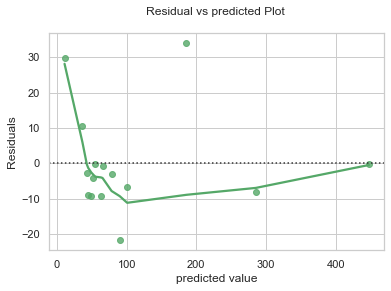

Wall time: 1min 1s


In [35]:
%%time
lambdas=np.linspace(0,0.05,1000)
params={'alpha':lambdas}
model=Lasso(fit_intercept=True)
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='r2')
grid_search.fit(X_train,y_train)
print(grid_search.best_estimator_)
grid_search.cv_results_
test_pred=grid_search.predict(X_test)
print('MSE',mean_absolute_error(y_test,test_pred))
print('train r2',grid_search.score(X_train,y_train) ,'test r2',grid_search.score(X_test,y_test))

resid = y_test -test_pred
sns.set(style = 'whitegrid')


ax = sns.residplot(test_pred, resid, lowess = True, color = 'g')
# lo we ss is a smoothening curving.locally weighted scatter plot smoothing.
ax.set(xlabel = 'predicted value', ylabel = 'Residuals', title = 'Residual vs predicted Plot \n')
plt.show()